# Heart Disease Detection Model Proposal

## Introduction:

In this proposal, we will aim to address a critical issue related to heart disease classification. Heart disease is the second leading cause of death in Canada affecting over 1.2 million citizens (1). As a result, a lot of research has been directed in the treatment and prevention of heart disease, but there is still a major need to accurately detect the presence of heart disease in the population. The purpose of this proposal is to explore how measured levels of 4 attributes from a patient can predict the presence of heart disease (on a scale of 0-4, 0 is non-presence). To explore this question, we will be using the “cleveland.processed.data” from the heart disease dataset on UC Irvine’s Machine Learning Repository (2).

## Method: 
Among the 14 columns of the dataset, we chose between 5 variables to be our predictor variable candidates. They were 1) resting blood pressure (trestbps/unit: mm Hg), 2) serum cholestoral(chol/unit: mg/dl), 3) maximum heart rate achieved(thalach), 4) ST depression induced by exercise relative to rest(oldpeak), and 5) number of major vessels (0-3) coloured by fluoroscopy (ca). We ultimately decided to use only quantitative variables and discarded the 5th variable (ca) since it is categorical. 

For our model training, we will use 75% of the entire dataset as a training set to train our classifier. We will ensure that our predictors are standardized, and the diagnosis presence (0-4) is balanced. Using a parameter grid with a range of k neighbor values, we will tune our model with k-fold cross validation. After fitting our predictors and target columns we will plot the knn value (x-axis) against the mean test score (y-axis) to determine the k-value that gives us the highest accuracy. Finally, we will evaluate our model on the test set, by comparing the true diagnosis on the test set with our predictions to calculate accuracy. 

As a part of tuning the classifier and to visualize the result of whether or not our model has good accuracy, we will use a line plot to show the relationship between a range of K neighbours and accuracy estimates from the test datasets. 

## Expected Results:
In our expected results, we anticipate finding a relationship between our 4 predictor variables and the presence or absence of heart disease. This classifier could have major impacts on the early detection of heart disease, allowing for earlier treatment and better prevention, potentially saving lives. In addition, this project could provide a basis for further research in the development of more accurate classifying models of heart disease, e.g. by further investigation into relevant predictor variables.


Package dependencies below:

In [1]:
!pip install pandas==1.5.3
!pip install scikit-learn==1.2.0
!pip install altair==4.2.2

In [2]:
import pandas as pd
import altair as alt
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Simplify working with large datasets in Altair
alt.data_transformers.disable_max_rows()

# Output dataframes instead of arrays
set_config(transform_output="pandas")

## Breakdown of Analysis (0 - 1 Prediction):

In [3]:
# Isolate our predictors
# 1) resting blood pressure (trestbps/unit: mm Hg)
# 2) serum cholestoral(chol/unit: mg/dl)
# 3) maximum heart rate achieved(thalach)
# 4) ST depression induced by exercise relative to rest(oldpeak)

# Remove empty value rows
# Balance the dataset 
# The absence of heart disease (0) is disproportionate to the presence of it (1-4) and our predictions will likely be biased towards non-presence.
# Convert presence (1-4) to 1 ?



# Scale (Normalize?) the predictors?
# Utilize the pairwise plots function from worksheet/tutorial to visualize the 4 predictors against eachother with absence and presence labelling
# Split training predictors from predicted column (heart_disease_presence), Predictors X and target y
# Train model with a range of k neighbors
# Create visualiztion of number of neighbors vs accuracy
# Select highest accuracy k
# Table showing the accuracy and statistics of the model

# Overlayed histograms of target 0 or 1 ?

### Reading in dataset from the web

Utilizing pd.read_csv we can read in the dataset from github as detailed below. We will also isolate our predictors and target. We can also split it into a training and testing set.

In [4]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_disease_presence']
url = 'https://github.com/CCWebb14/DSCI100_Group_Project/blob/main/data/processed.cleveland.data?raw=true'

# Isolate our predictors and target
# 1) resting blood pressure (trestbps/unit: mm Hg)
# 2) serum cholestoral(chol/unit: mg/dl)
# 3) maximum heart rate achieved(thalach)
# 4) ST depression induced by exercise relative to rest(oldpeak)

# Read in data and isolate predictors

cleveland = pd.read_csv(url, names=col_names)

cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Dataset preprocessing

Dropping rows with empty values, and converting heart_disease_presence to 0 or 1

In [5]:
cleveland = cleveland[~cleveland.isin(['?']).any(axis=1)]
def replace_values_greater_than_1(value):
    if value > 1:
        return 1
    else:
        return value

cleveland['heart_disease_presence'] = cleveland['heart_disease_presence'].apply(replace_values_greater_than_1)
cleveland

/tmp/ipykernel_526/131095503.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleveland['heart_disease_presence'] = cleveland['heart_disease_presence'].apply(replace_values_greater_than_1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


Split into training and testing

In [6]:
cleveland_train, cleveland_test = train_test_split(cleveland, test_size=0.25, random_state=330)
cleveland_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
215,56.0,1.0,1.0,120.0,193.0,0.0,2.0,162.0,0.0,1.9,2.0,0.0,7.0,0
117,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,1
20,64.0,1.0,1.0,110.0,211.0,0.0,2.0,144.0,1.0,1.8,2.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
229,66.0,1.0,4.0,112.0,212.0,0.0,2.0,132.0,1.0,0.1,1.0,1.0,3.0,1
207,50.0,1.0,4.0,144.0,200.0,0.0,2.0,126.0,1.0,0.9,2.0,0.0,7.0,1
259,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1


Creating a preprocessor to standardize our predictors (centering (avg=0) and scaling (sd=1)). Transforming our test and training data separately to prevent data leakage.

In [7]:
cleveland_preprocessor = make_column_transformer(
    (StandardScaler(), ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']),
    remainder = 'passthrough',
    verbose_feature_names_out=False
)

cleveland_train_scaled = cleveland_preprocessor.fit_transform(cleveland_train)
cleveland_test_scaled = cleveland_preprocessor.fit_transform(cleveland_test)

#### Disease Presence Counts

The second table reports the count of each heart disease presence (heart_disease_presence column: 0 (no presence) to 1 (presence)). 

In [8]:
disease_presence_counts = pd.DataFrame(cleveland_train_scaled['heart_disease_presence'].value_counts()).reset_index().rename(
    columns={'index': 'heart_disease_presence', 'heart_disease_presence':'count'})

disease_presence_counts

,heart_disease_presence,count
0,0,119
1,1,103


To balance the dataset, we can upsample the positive heart_disease_presence samples to the size of the non-presence

In [9]:
positive_heart_disease = cleveland_train_scaled[cleveland_train_scaled['heart_disease_presence'] == 1]
negative_heart_disease = cleveland_train_scaled[cleveland_train_scaled['heart_disease_presence'] == 0]

positive_heart_disease_upsample = resample(
    positive_heart_disease, n_samples=negative_heart_disease.shape[0]
)
upsampled_positive_heart_disease = pd.concat((positive_heart_disease_upsample, negative_heart_disease))
upsampled_positive_heart_disease['heart_disease_presence'].value_counts()

1    119
0    119
Name: heart_disease_presence, dtype: int64

In [10]:
X_train = upsampled_positive_heart_disease.drop(columns = {'heart_disease_presence'})
y_train = upsampled_positive_heart_disease['heart_disease_presence']

Exploring a range of n_neighbors with GridSearchCV and performing a 10-fold cross validation. Scoring based on recall for clinical reasons.

In [11]:
param_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 30, 1),
}
cleveland_tune_pipe = make_pipeline(cleveland_preprocessor, KNeighborsClassifier())

In [12]:
knn_tune_grid = GridSearchCV(
    cleveland_tune_pipe, param_grid, cv=10, scoring='recall'
)

In [13]:
knn_model_grid = knn_tune_grid.fit(X_train, y_train)

accuracies_grid = pd.DataFrame(knn_model_grid.cv_results_) 
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013417,0.003655,0.014477,0.006313,1,{'kneighborsclassifier__n_neighbors': 1},1.000000,1.000000,0.750000,1.000000,0.833333,0.916667,0.916667,0.916667,0.833333,0.909091,0.907576,0.078569,1
1,0.009691,0.000868,0.009327,0.001955,2,{'kneighborsclassifier__n_neighbors': 2},0.916667,0.666667,0.583333,0.916667,0.583333,0.500000,0.666667,0.666667,0.666667,0.909091,0.707576,0.144465,29
2,0.008838,0.000488,0.008637,0.000973,3,{'kneighborsclassifier__n_neighbors': 3},0.916667,0.833333,0.583333,0.916667,0.833333,0.833333,0.916667,0.750000,1.000000,0.909091,0.849242,0.110120,2
3,0.008909,0.000900,0.008302,0.000860,4,{'kneighborsclassifier__n_neighbors': 4},0.916667,0.750000,0.583333,0.916667,0.666667,0.500000,0.833333,0.666667,1.000000,0.909091,0.774242,0.157670,12
4,0.008813,0.001094,0.008003,0.000690,5,{'kneighborsclassifier__n_neighbors': 5},1.000000,0.833333,0.583333,0.916667,0.750000,0.583333,0.833333,0.750000,1.000000,0.909091,0.815909,0.142861,4
5,0.010223,0.001521,0.009962,0.002150,6,{'kneighborsclassifier__n_neighbors': 6},1.000000,0.833333,0.583333,0.833333,0.750000,0.583333,0.750000,0.666667,1.000000,0.909091,0.790909,0.144901,10
6,0.009333,0.001447,0.009962,0.003020,7,{'kneighborsclassifier__n_neighbors': 7},1.000000,0.833333,0.583333,0.916667,0.750000,0.666667,0.833333,0.833333,1.000000,0.909091,0.832576,0.128630,3
7,0.009413,0.000811,0.008779,0.000944,8,{'kneighborsclassifier__n_neighbors': 8},0.916667,0.833333,0.583333,0.833333,0.666667,0.416667,0.833333,0.750000,0.916667,0.909091,0.765909,0.156525,16
8,0.009981,0.002452,0.009408,0.001622,9,{'kneighborsclassifier__n_neighbors': 9},1.000000,0.833333,0.666667,0.833333,0.750000,0.500000,0.833333,0.833333,0.916667,0.909091,0.807576,0.134037,5
9,0.009038,0.000605,0.009545,0.001991,10,{'kneighborsclassifier__n_neighbors': 10},0.916667,0.750000,0.666667,0.833333,0.666667,0.333333,0.833333,0.666667,0.916667,0.909091,0.749242,0.170057,24


In [14]:
accuracy_versus_k_grid = alt.Chart(accuracies_grid).mark_line(point=True).encode(
    x = alt.X('param_kneighborsclassifier__n_neighbors', title='Number of Neighbors', scale=alt.Scale(zero=False)),
    y = alt.Y('mean_test_score', title='Mean Test Score', scale=alt.Scale(zero=False))
)

 
accuracy_versus_k_grid

alt.Chart(...)

In [15]:
# Selecting n=3

In [16]:
knn_spec = KNeighborsClassifier(n_neighbors=3)
cleveland_fit = make_pipeline(cleveland_preprocessor, knn_spec).fit(X_train, y_train)

In [17]:
cleveland_test_predictions = cleveland_test.assign(
    predicted = cleveland_fit.predict(cleveland_test_scaled)
)
cleveland_test_predictions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence,predicted
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1,0
53,44.0,1.0,2.0,130.0,219.0,0.0,2.0,188.0,0.0,0.0,1.0,0.0,3.0,0,0
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0,0
274,59.0,1.0,1.0,134.0,204.0,0.0,0.0,162.0,0.0,0.8,1.0,2.0,3.0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,58.0,1.0,4.0,146.0,218.0,0.0,0.0,105.0,0.0,2.0,2.0,1.0,7.0,1,1
63,54.0,0.0,3.0,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0,0
187,66.0,1.0,2.0,160.0,246.0,0.0,0.0,120.0,1.0,0.0,2.0,3.0,6.0,1,1
102,57.0,0.0,4.0,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0,0


Determining accuracy

In [18]:
X_test = cleveland_test_scaled.drop(columns = {'heart_disease_presence'})
y_test = cleveland_test_scaled['heart_disease_presence']

cleveland_prediction_accuracy = cleveland_fit.score(X_test, y_test)
cleveland_prediction_accuracy

0.8133333333333334

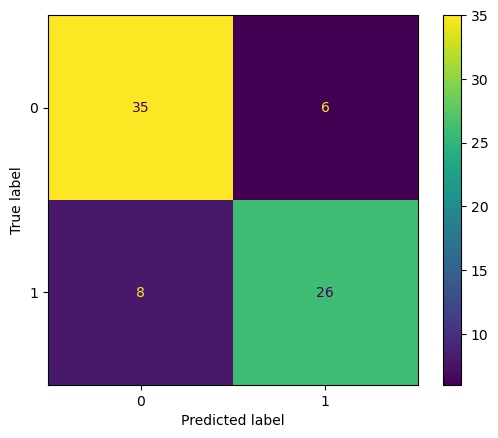

In [19]:
ConfusionMatrixDisplay.from_estimator(
    cleveland_fit,  # We are directly passing the pipeline and let sklearn do the predictions for us
    X_test,
    y_test
)

In [20]:
y_true = cleveland_test_predictions['heart_disease_presence']
y_pred = cleveland_test_predictions['predicted']

In [21]:
precision = precision_score(y_true, y_pred)
precision

0.8125

In [22]:
recall = recall_score(y_true, y_pred)
recall

0.7647058823529411

## Methods for Classification:

## Results with Visualization:

## Discussion:

## References:

1. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html 
2. https://archive.ics.uci.edu/dataset/45/heart+disease 